In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("../data/books.json")

In [3]:
# Clean missing values
df.fillna({"genre": "Unknown", "average_rating": 0, "ratings_count": 0}, inplace=True)

,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,last_checkout,available
0,1,The Pragmatic Programmer,Andrew Hunt,Programming,1999,352,4.5,1500.0,39.99,NaN,NaN,NaN,1.0,NaN,NaN,True
1,2,Clean Code,Robert C. Martin,Programming,2008,464,4.7,2000.0,49.99,NaN,NaN,NaN,NaN,NaN,NaN,True
2,3,Deep Learning,Ian Goodfellow,AI,2016,775,4.6,900.0,59.99,NaN,NaN,NaN,NaN,NaN,NaN,True
3,4,Atomic Habits,James Clear,Self-help,2018,320,4.8,2500.0,18.99,NaN,NaN,NaN,NaN,NaN,NaN,True
4,5,The Lean Startup,Eric Ries,Business,2011,336,4.2,1200.0,24.99,NaN,NaN,NaN,NaN,NaN,NaN,True
5,6,"Thinking, Fast and Slow",Daniel Kahneman,Psychology,2011,512,4.5,2200.0,22.50,NaN,NaN,NaN,NaN,NaN,NaN,True
6,7,Python Crash Course,Eric Matthes,Programming,2019,544,4.7,1800.0,35.00,NaN,NaN,NaN,NaN,NaN,NaN,True
7,8,AI Superpowers,Kai-Fu Lee,AI,2018,256,4.3,1300.0,19.99,NaN,NaN,NaN,NaN,NaN,NaN,True
8,9,The Alchemist,Paulo Coelho,Fiction,1988,208,4.4,3000.0,14.99,NaN,NaN,NaN,NaN,NaN,NaN,True
9,10,Sapiens: A Brief History of Humankind,Yuval Noah Harari,History,2011,498,4.6,2500.0,22.00,NaN,NaN,NaN,NaN,NaN,NaN,True


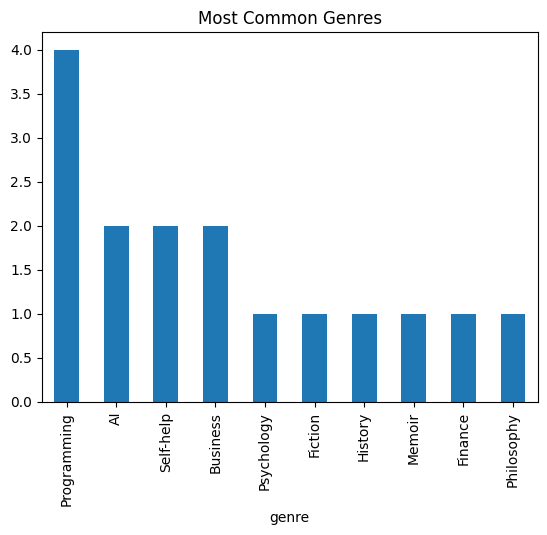

In [4]:

# Most common genres
genre_counts = df["genre"].value_counts()
genre_counts.plot(kind="bar", title="Most Common Genres")
plt.savefig("../assets/charts/genre_counts.png")


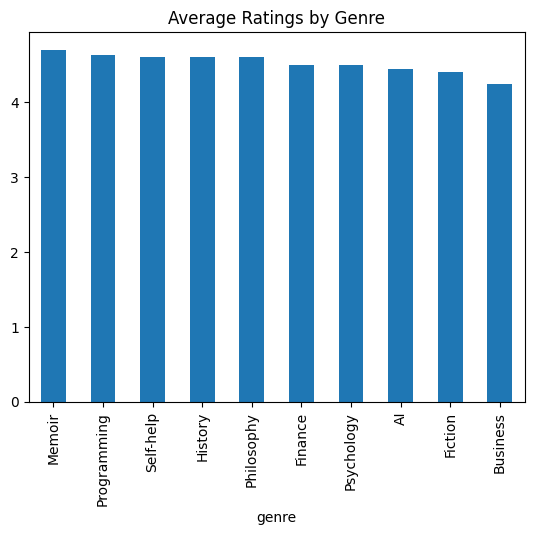

In [5]:

# Highest rated genres
avg_ratings = df.groupby("genre")["average_rating"].mean().sort_values(ascending=False)
avg_ratings.plot(kind="bar", title="Average Ratings by Genre")
plt.savefig("../assets/charts/avg_ratings.png")


In [6]:

# Weighted Bayesian rating
m = 50
C = df["average_rating"].mean()
v = df["ratings_count"]
R = df["average_rating"]
df["weighted_rating"] = (v / (v + m)) * R + (m / (v + m)) * C


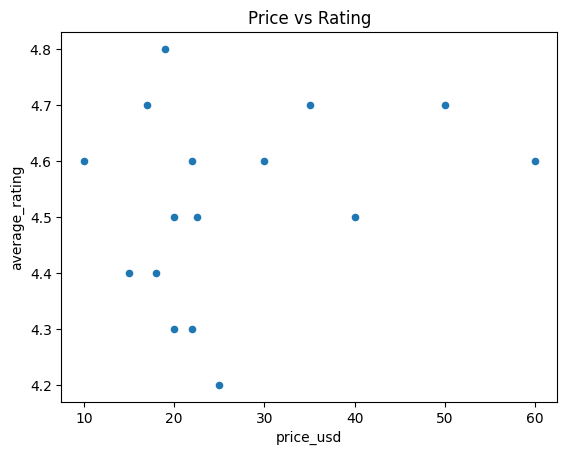

In [7]:
# Scatter plot: price vs rating
df.plot.scatter(x="price_usd", y="average_rating", title="Price vs Rating")
plt.savefig("../assets/charts/price_vs_rating.png")

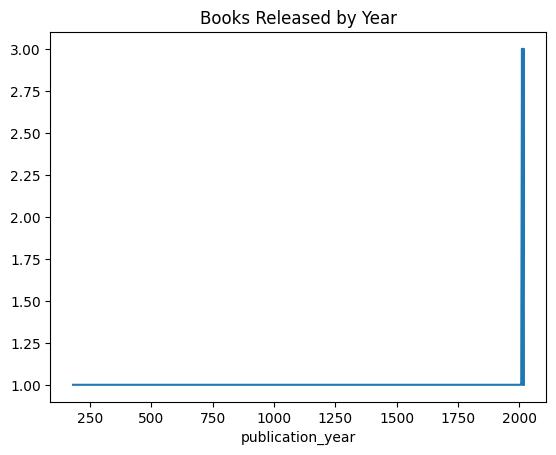

In [8]:
# Books released by year
df.groupby("publication_year").size().plot(kind="line", title="Books Released by Year")
plt.savefig("../assets/charts/books_by_year.png")

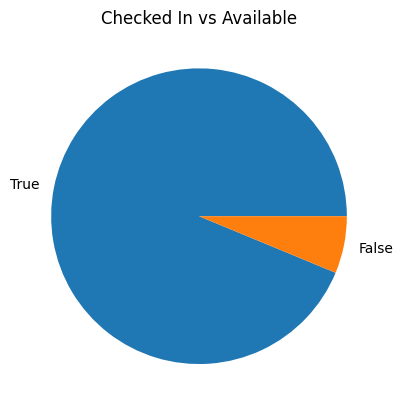

In [9]:
# Checked in vs available
df["available"].value_counts().plot(kind="pie", title="Checked In vs Available")
plt.savefig("../assets/charts/available_pie.png")